# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [51]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [52]:
# Reading the dataset and reviewing the top 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [53]:
# Using the shape property to return the number of rows

df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [54]:
# Using the nunique() method to find out the number of unique users 

df.nunique()['user_id']

290584

**d.** The proportion of users converted.

In [55]:
# Dividing the sum of converted users (since values are 1 for converted and 0 for non converted)
# by the number of unique users

df['converted'].sum() / df.nunique()['user_id']

0.12126269856564711

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [56]:
# Calculating the number of rows where new_page and treatment don't line up by adding 
# treatment and NOT new_page + new_page and NOT treatment

len(df.query ('group == "treatment" and landing_page != "new_page"')) + \
len(df.query ('landing_page == "new_page"and group != "treatment" '))

3893

**f.** Do any of the rows have missing values?

In [57]:
# Checking the data set info for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Answer:**
>**No missing values found.**

For the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [58]:
# Removing the inaccurate rows, and store the result in a new dataframe df2
# First, drop rows from df for treatment not aligned with new_page and store results in df2

df2 = df.drop(df.query('group == "treatment" and landing_page != "new_page"').index)

# Second, drop rows from df2 for control not aligned with old_page inplace

df2.drop(df2.query('group == "control" and landing_page != "old_page"').index, inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [59]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [60]:
# Using the nunique() method to find out the number of unique users 

df2.nunique()['user_id']

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [61]:
# Finding the one user_id repeated in df2

print("The one user_id repeated in df2 is {}".\
      format(df2[df2.duplicated(['user_id'], keep='first')]['user_id'].to_string(index=False)))

The one user_id repeated in df2 is 773192


**c.** Display the rows for the duplicate **user_id**? 

In [62]:
# Displying the row information for the duplicate user_id

df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [63]:
# Considering that there is consistency with this id, we can probably just choose either and remove. 
# As we shouldn't be counting the same user more than once.
# Assuming that we want to keep the last row. So, we drop the entire row of the first index.

df2=df2.drop(df2[df2.duplicated(['user_id'], keep='last')]['user_id'].index.values[0])


In [64]:
# Check which row was dropped

df2[df2['user_id']==773192]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [65]:
# Calculate the probability that an individual converting regardless of the page they receive

df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [66]:
# Calculate the probability that an individual in the control group is converted

df2.query('group == "control"').converted.mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [67]:
# Calculate the probability that an individual in the treatment group is converted

df2.query('group == "treatment"').converted.mean()

0.11880806551510564

In [68]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups

obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [69]:
# Probability that an individual received the new_page is 
# users who received the new_page divided by total number of unique users

df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Answer:**
>**Results:**
The probability of an individual in the control group converting is almost **12.04%**, while the probability of an individual in the treatment group converting is almost **11.88%**. This leads to the conclusion of old page is actually better than the new one with a negligible difference.
>
>
>**Limitations:**
Other factors need to be considered like test duration that might change the results.
>
>**So, we cannot consider that there is sufficient evidence to say that any of the pages leads to more conversions.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


For now, consider you need to make the decision just based on all the data provided.  
If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**Answer:**
>Null Hypothesis
**$H_{0}$** :  **$p_{old}$** -  **$p_{new}$** >= 0
>
>Alternative Hypothesis
**$H_{1}$** :  **$p_{old}$** - **$p_{new}$** < 0

Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. 
- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [70]:
# Assuming under the null hypothesis,  𝑝_𝑛𝑒𝑤  and  𝑝_𝑜𝑙𝑑  both have "true" success rates 
# equal to the converted success rate regardless of page - that is  𝑝_𝑛𝑒𝑤  and  𝑝_𝑜𝑙𝑑  are equal. 
# and assuming they are equal to the converted rate in ab_data.csv regardless of the page.

p_new = df2['converted'].mean()
print("The convert rate for 𝑝_𝑛𝑒𝑤 under the null is {}".format(p_new))

The convert rate for 𝑝_𝑛𝑒𝑤 under the null is 0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [71]:
# Assuming under the null hypothesis,  𝑝_𝑛𝑒𝑤  and  𝑝_𝑜𝑙𝑑  both have "true" success rates 
# equal to the converted success rate regardless of page - that is  𝑝_𝑛𝑒𝑤  and  𝑝_𝑜𝑙𝑑  are equal. 
# and assuming they are equal to the converted rate in ab_data.csv regardless of the page.

p_old = df2['converted'].mean()
print("The convert rate for 𝑝_𝑜𝑙𝑑 under the null is {}".format(p_old))

The convert rate for 𝑝_𝑜𝑙𝑑 under the null is 0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [72]:
# Calculate the number of individuals in the treatment group (𝑛_𝑛𝑒𝑤)

n_new = df2.query('group == "treatment"').shape[0]
print("The 𝑛_𝑛𝑒𝑤 is {}".format(n_new))

The 𝑛_𝑛𝑒𝑤 is 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [73]:
# Calculate the number of individuals in the control group (𝑛_𝑜𝑙𝑑)

n_old = df2.query('group == "control"').shape[0]
print("The 𝑛_𝑜𝑙𝑑 is {}".format(n_old))

The 𝑛_𝑜𝑙𝑑 is 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [74]:
# Simulate a sample for the treatment group by simulating n_new transactions 
# with a conversion rate of p_new under the null hypothesis.

new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,1-p_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [75]:
# Simulate a Sample for the control Group by simulating n_old transactions 
# with a conversion rate of p_old under the null hypothesis.

old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old,1-p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [76]:
# Calculating the difference in the "converted" probability  (p′new  -  p′old)  
# for your simulated samples.

new_page_converted.mean() - old_page_converted.mean()

-0.00020875135334405548


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [77]:
# Create a sampling distribution of the difference in the "converted" probability  (p′new  -  p′old) 

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,1-p_new])
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old,1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>


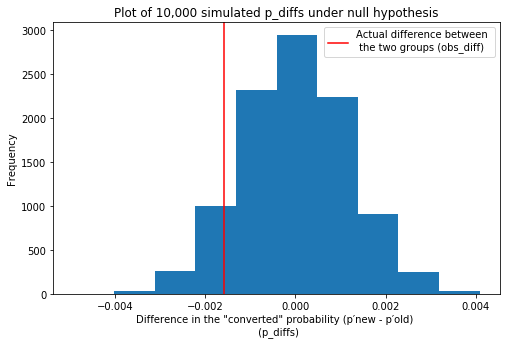

In [78]:
plt.figure(figsize=(8,5))
plt.hist(p_diffs)
plt.xlabel('Difference in the "converted" probability (p′new - p′old) \n (p_diffs)')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 simulated p_diffs under null hypothesis')
plt.axvline(obs_diff, color='red',label='Actual difference between \n the two groups (obs_diff)')
plt.legend();

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [79]:
# Calculating the p-value
(np.array(p_diffs) > obs_diff).mean()

0.9103

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

**Answer:**
>The proportion of the **(p_diffs)** that are greater than the actual difference observed **(obs_diff)** in ab_data.csv is called the ***p-value*** in scientific studies. 
>
>The ***p-value*** is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
>
>Based on the data, the ***p-value*** is much higher than 0.05, so we fail to reject the null hypothesis. Hence, we conclude that the new and old pages are almost has the same conversion rate.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [80]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page"and converted == 1').converted.shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').shape[0]

# number of individuals who received new_page
n_new = df2.query('group == "treatment"').shape[0]


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.



In [81]:
# Calculating z-score and p-value

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


**Answer:**
> The **z-score** represents the distance between the two "converted" success rates in terms of the standard error.  
> $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval is **1.645** for one-tailed tests
> and since we defined $H_1$ as $(p_{new} > p_{old})$ it's a right-tailed test. 
>
>For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
> 
>And since **z-score** = **-1.31** which is less than $Z_{\alpha}$ **1.645** so we fail to reject the null hypothesis.
>
>Based on the data, the ***p-value*** (0.905) is much higher than 0.05, so we fail to reject the null hypothesis. Hence, we conclude that the new and old pages are almost has the same conversion rate.
>
>The findings here agree with findings in parts **j.** and **k.**

<a id='regression'></a>
### Part III - A regression approach

In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**
>**We should be performing a logistic regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [82]:
# Adding an intercept column
df2['intercept'] = 1

# Adding an ab_page column, which is 1 when an individual receives the treatment and 0 if control using get_dummies.
df2[['cont_page', 'ab_page']] = pd.get_dummies(df2['group'])

df2 = df2.drop('cont_page', axis=1) # Removing the cont_page column.
df2.head() # Checking output  

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [83]:
# Creating logistic regression model using statsmodels and fitting the model using the two columns ab_page and intercept.

results = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
# Providing the summary of the logistic regression model.
# I used summary2() because summary didn't work on the workspace.
print(results.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-21 00:12 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



In [85]:
# We can create logistic regression model using statsmodels.formula in an easy way as follows

import statsmodels.formula.api as smf
results1 = smf.logit(formula='converted ~ landing_page',data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [86]:
# Providing the summary of the logistic regression model using statsmodels.formula.
# I used summary2() because summary didn't work on the workspace.
print(results1.summary2())

                              Results: Logit
Model:                  Logit              No. Iterations:     6.0000     
Dependent Variable:     converted          Pseudo R-squared:   0.000      
Date:                   2022-01-21 00:12   AIC:                212780.3502
No. Observations:       290584             BIC:                212801.5095
Df Model:               1                  Log-Likelihood:     -1.0639e+05
Df Residuals:           290582             LL-Null:            -1.0639e+05
Converged:              1.0000             Scale:              1.0000     
--------------------------------------------------------------------------
                          Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                -2.0038   0.0081 -247.1457 0.0000 -2.0197 -1.9879
landing_page[T.old_page]  0.0150   0.0114    1.3109 0.1899 -0.0074  0.0374



**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



**Answer:**
>The **p-value** associated with **ab_page** = **0.19** which is differ from the value you found in Part II because the null and alternative hypotheses associated with our regression model is:
>
>Null Hypothesis
**$H_{0}$** :  **$p_{old}$** -  **$p_{new}$** = 0
>
>Alternative Hypothesis
**$H_{1}$** :  **$p_{old}$** - **$p_{new}$** != 0
>
>which are different than the null and alternative hypotheses in Part II in which the **Null Hypothesis** was **$H_{0}$** :  **$p_{old}$** -  **$p_{new}$** >= 0 and **Alternative Hypothesis** was **$H_{1}$** :  **$p_{old}$** - **$p_{new}$** < 0



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
>Considering other factors into the regression model like **Time of year**, **Browser used** and **User age** is good as it leads to more realistic results and might influence the conversion rate in either page. The disadvantage would be the complexity as factors might affect other factors or even have no effect at all.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [87]:
# Reading countries.csv and reviewing the top 5 rows

countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [88]:
# Join with the df2 dataframe

df_merged = countries_df.set_index('user_id').join(df2.set_index('user_id'))
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [89]:
# Create the necessary dummy variables

df_merged_dum = pd.get_dummies(df_merged['country']).join(df_merged)
df_merged_dum.head()


,CA,UK,US,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,
834778,0,1,0,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,0,0,1,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,0,1,0,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,0,1,0,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,0,1,0,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [90]:
# Creating logistic regression model using statsmodels and fitting the model considering US as a baseline country.
 
results2 = smf.logit(formula='converted ~ ab_page + UK + CA',data=df_merged_dum).fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [91]:
# Providing the summary of the logistic regression model using statsmodels.formula.
# I used summary2() because summary didn't work on the workspace.

print(results2.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-21 00:13 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119



In [92]:
# Creating two additional columns which represent the interaction between page and country.

df_merged_dum['CA_new'] = df_merged_dum['CA'] * df_merged_dum['ab_page']
df_merged_dum['UK_new'] = df_merged_dum['UK'] * df_merged_dum['ab_page']

In [93]:
# Creating logistic regression model using statsmodels and fitting the model using ab_page, UK, CA, CA_new and UK_new.

results3 = smf.logit(formula='converted ~ ab_page + UK + CA + CA_new + UK_new',data=df_merged_dum).fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [94]:
# Providing the summary of the logistic regression model using statsmodels.formula.
# I used summary2() because summary didn't work on the workspace.

print(results3.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-21 00:13 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
CA_new       -

## **Conclusion:**
>Looking at the logistic regression results above with US as baseline country, we can see that correlation coefficient is very small for both UK and CA which means that the relationship between user’s country and convert is very weak. 
>
>Also, p-value for all variables > 0.05  which is not statistically significant. In addition, z-score not large enough to be significant. 
>
>So, we failed to reject the null hypothesis meaning that the user country is not significantly affecting the convert rate.
>
### **Reference to all tests that we've performed above, we conclude that the new page did not prove to be better in convert rate.**


In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0